In [2]:
#Import Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

#Read cleaned Unemployment Data, cleaned in cleaning process folder.
employ_df = pd.read_csv("Resources/cleanedstateemployment_monthly.csv")
employ_df.head()

,State,Year,Month,Value,1-Month % Change
0,Alabama,2000,1,4.7,-2.1
1,Alabama,2000,2,4.7,0.0
2,Alabama,2000,3,4.6,-2.1
3,Alabama,2000,4,4.6,0.0
4,Alabama,2000,5,4.5,-2.2


In [3]:
#Update column to be more descriptive
employ_df = employ_df.rename(columns = {"Value": "Unemployment"})
employ_df.head()

,State,Year,Month,Unemployment,1-Month % Change
0,Alabama,2000,1,4.7,-2.1
1,Alabama,2000,2,4.7,0.0
2,Alabama,2000,3,4.6,-2.1
3,Alabama,2000,4,4.6,0.0
4,Alabama,2000,5,4.5,-2.2


In [4]:
#Count how many states are in employment data
len(employ_df["State"].unique())


51

In [5]:
#Read cleaned pollututant data, cleaned in Excel
pollutant_df = pd.read_csv("Resources/cleaned_upollution_2005_2016.csv")
pollutant_df.head()

,State,Sample Year,Sample Month,NO2 Units,Average of NO2 Mean,O3 Units,Average of O3 Mean,SO2 Units,Average of SO2 Mean,CO Units,Average of CO Mean
0,Arizona,2005,1,Parts per billion,22.674850,Parts per million,0.010018,Parts per billion,1.215276,Parts per million,0.661753
1,Arizona,2005,2,Parts per billion,19.542680,Parts per million,0.015479,Parts per billion,0.678611,Parts per million,0.466213
2,Arizona,2005,3,Parts per billion,19.674832,Parts per million,0.024243,Parts per billion,1.245270,Parts per million,0.523486
3,Arizona,2005,4,Parts per billion,21.509326,Parts per million,0.031231,Parts per billion,1.787622,Parts per million,0.605336
4,Arizona,2005,5,Parts per billion,19.719337,Parts per million,0.031362,Parts per billion,2.313748,Parts per million,0.565971


In [6]:
#Count how many states are in pollutant data
len(pollutant_df["State"].unique())

47

In [7]:
#Since pollutant data has less states, this is the number we will use
em_st = pollutant_df['State']

In [8]:
#Renaming Columns of Pollutant Data to match Employment Data
pollutant_df2 = pollutant_df.rename(columns = {"Sample Year": "Year", "Sample Month": "Month"})

#Looking at how far the years go back, only a few states have all the data between 2005 and 2016, 
# so we need to capture only those states
states_df = pollutant_df2.loc[pollutant_df2['Year'] == 2005].reset_index()

#updating em_st again to only include these states
em_st = states_df['State']

pollutant_df3 = pollutant_df2[pollutant_df2.State.isin(em_st)]
pollutant_df3.head()

,State,Year,Month,NO2 Units,Average of NO2 Mean,O3 Units,Average of O3 Mean,SO2 Units,Average of SO2 Mean,CO Units,Average of CO Mean
0,Arizona,2005,1,Parts per billion,22.674850,Parts per million,0.010018,Parts per billion,1.215276,Parts per million,0.661753
1,Arizona,2005,2,Parts per billion,19.542680,Parts per million,0.015479,Parts per billion,0.678611,Parts per million,0.466213
2,Arizona,2005,3,Parts per billion,19.674832,Parts per million,0.024243,Parts per billion,1.245270,Parts per million,0.523486
3,Arizona,2005,4,Parts per billion,21.509326,Parts per million,0.031231,Parts per billion,1.787622,Parts per million,0.605336
4,Arizona,2005,5,Parts per billion,19.719337,Parts per million,0.031362,Parts per billion,2.313748,Parts per million,0.565971


In [9]:
#combine the data sets now that we have everything.
employ_pollutant = pollutant_df2.merge(employ_df, how = "inner")
employ_pollutant_year = employ_pollutant.groupby(["Year"]).mean()
employ_pollutant_year.head()

,Month,Average of NO2 Mean,Average of O3 Mean,Average of SO2 Mean,Average of CO Mean,Unemployment,1-Month % Change
Year,,,,,,,
2005,6.487047,15.707955,0.024888,3.139843,0.426073,5.089119,-0.473575
2006,6.468504,13.773114,0.025567,2.844463,0.376567,4.564173,-0.584252
2007,6.466667,12.507063,0.025739,2.380635,0.348483,4.337895,0.372982
2008,6.531773,11.314656,0.025464,1.871283,0.294194,5.285953,3.387960
2009,6.528428,10.015557,0.025085,1.611979,0.281375,8.462207,2.184615


In [11]:
#Create linear regression function and string of linear regression equation

def linear_regression(x, y):
    (slope, intercept, rvalue, pvalue, stderr)=linregress(x,y)
    regress_values = x*slope + intercept
    line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
    return regress_values

#Creating function to return a string of linear regression equation
def linear_regression_eq(x, y):
    (slope, intercept, rvalue, pvalue, stderr)=linregress(x,y)
    line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept,2)) +", r= " + str(round(rvalue,2))
    return line_eq

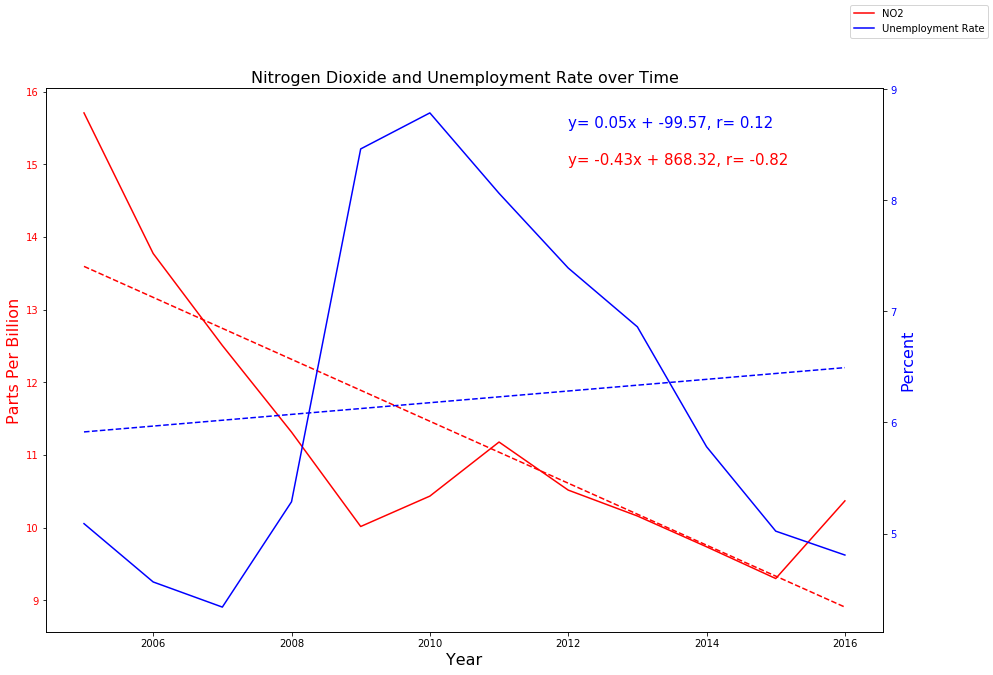

In [13]:
#Create lines for unemployment and N02
no2_line = linear_regression(employ_pollutant_year.index, employ_pollutant_year["Average of NO2 Mean"])
employ_line = linear_regression(employ_pollutant_year.index, employ_pollutant_year["Unemployment"])
#Create strings of linear equation to put on chart
no2_line_eq = linear_regression_eq(employ_pollutant_year.index, employ_pollutant_year["Average of NO2 Mean"])
employ_line_eq = linear_regression_eq(employ_pollutant_year.index, employ_pollutant_year["Unemployment"])


#Create figure
fig, ax1 = plt.subplots(figsize=(15,10))
#Plot NO2 over time
color = 'red'
ax1.set_xlabel('Year',fontsize = 16)
ax1.set_ylabel('Parts Per Billion', fontsize = 16, color=color)
ax1.plot(employ_pollutant_year.index, employ_pollutant_year["Average of NO2 Mean"], color=color, label = "NO2")
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(employ_pollutant_year.index,no2_line,color = 'red', linestyle = '--')
ax1.annotate(no2_line_eq, (2012,15), fontsize = 15, color = "red")
ax1.annotate(employ_line_eq, (2012,15.5), fontsize = 15, color = "blue")
#Plot unemployment on same graph
ax2 = ax1.twinx()  
color = 'blue'
ax2.set_ylabel('Percent', color=color, fontsize = 16)
ax2.plot(employ_pollutant_year.index, employ_pollutant_year["Unemployment"], color=color, label = "Unemployment Rate")
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(employ_pollutant_year.index,employ_line,'b--')
fig.legend(loc='upper right')
plt.title("Nitrogen Dioxide and Unemployment Rate over Time", fontsize = 16)
plt.show()
#save figure
fig.savefig('Images/NO2_vs_Unemployment.png')


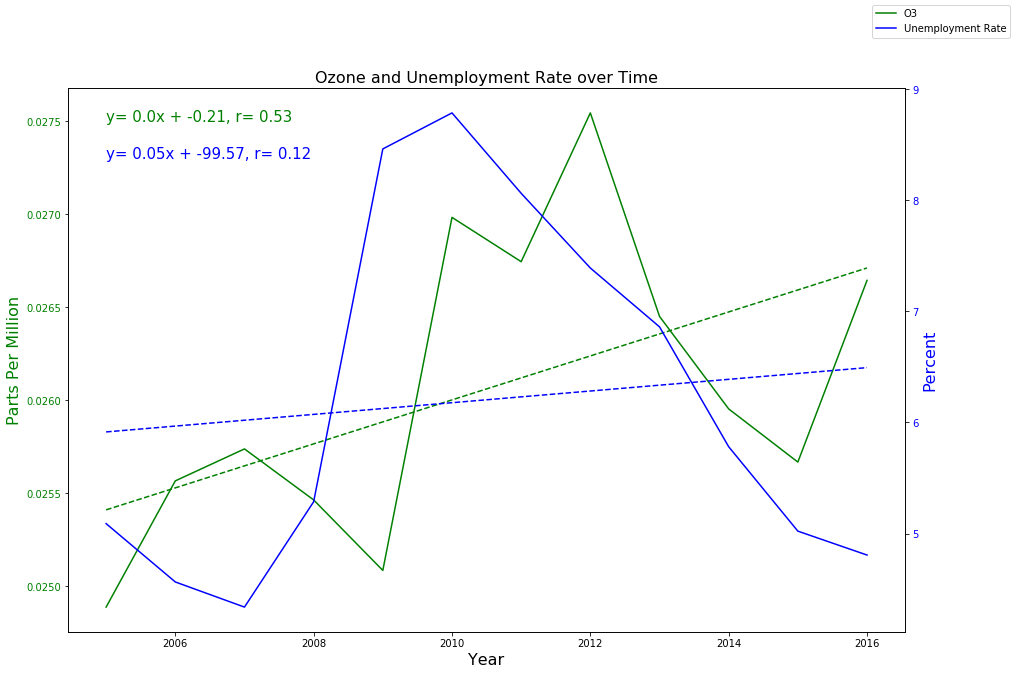

In [14]:
#Create lines for unemployment and O3
O3_line = linear_regression(employ_pollutant_year.index, employ_pollutant_year["Average of O3 Mean"])
employ_line = linear_regression(employ_pollutant_year.index, employ_pollutant_year["Unemployment"])
#Create string of linear equation to put on chart
O3_line_eq = linear_regression_eq(employ_pollutant_year.index, employ_pollutant_year["Average of O3 Mean"])

#Create figure
fig, ax1 = plt.subplots(figsize=(15,10))

color = 'green'
ax1.set_xlabel('Year', fontsize = 16)
ax1.set_ylabel('Parts Per Million', color=color, fontsize = 16)
ax1.plot(employ_pollutant_year.index, employ_pollutant_year["Average of O3 Mean"], color=color, label = "O3")
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(employ_pollutant_year.index,O3_line, color = 'green', linestyle = '--')
ax1.annotate(O3_line_eq, (2005,0.0275), fontsize = 15, color = "green")
ax1.annotate(employ_line_eq, (2005,0.0273), fontsize = 15, color = "blue")
#Plot unemployment on same graph
ax2 = ax1.twinx()  
color = 'blue'
ax2.set_ylabel('Percent', color=color, fontsize = 16) 
ax2.plot(employ_pollutant_year.index, employ_pollutant_year["Unemployment"], color=color, label = "Unemployment Rate")
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(employ_pollutant_year.index,employ_line, 'b--')
fig.legend(loc='upper right')
plt.title("Ozone and Unemployment Rate over Time", fontsize = 16)
plt.show()
#Save figure
fig.savefig('Images/O3_vs_Unemployment.png')

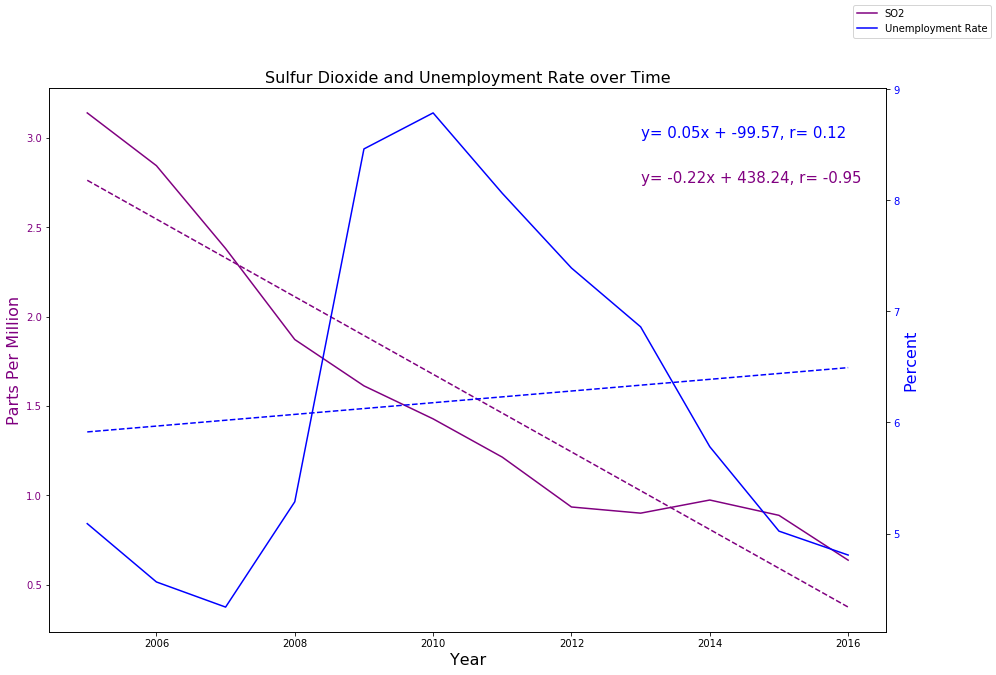

In [15]:
#Create lines for unemployment and SO2
SO2_line = linear_regression(employ_pollutant_year.index, employ_pollutant_year["Average of SO2 Mean"])
employ_line = linear_regression(employ_pollutant_year.index, employ_pollutant_year["Unemployment"])
#Create string of linear equation to put on chart
SO2_line_eq = linear_regression_eq(employ_pollutant_year.index, employ_pollutant_year["Average of SO2 Mean"])
#Create figure
fig, ax1 = plt.subplots(figsize=(15,10))

color = 'purple'
ax1.set_xlabel('Year', fontsize = 16)
ax1.set_ylabel('Parts Per Million', color=color, fontsize = 16)
ax1.plot(employ_pollutant_year.index, employ_pollutant_year["Average of SO2 Mean"], color=color, label = "SO2")
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(employ_pollutant_year.index,SO2_line, color ='purple', linestyle = '--')
ax1.annotate(SO2_line_eq, (2013,2.75), fontsize = 15, color = "purple")
ax1.annotate(employ_line_eq, (2013,3.0), fontsize = 15, color = "blue")
#Plot unemployment on same graph
ax2 = ax1.twinx()  

color = 'blue'
ax2.set_ylabel('Percent', color=color, fontsize = 16)
ax2.plot(employ_pollutant_year.index, employ_pollutant_year["Unemployment"], color=color, label = "Unemployment Rate")
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(employ_pollutant_year.index,employ_line, 'b--')
fig.legend(loc='upper right')
plt.title("Sulfur Dioxide and Unemployment Rate over Time", fontsize = 16)
plt.show()
#Save figure
fig.savefig('Images/SO2_vs_Unemployment.png')

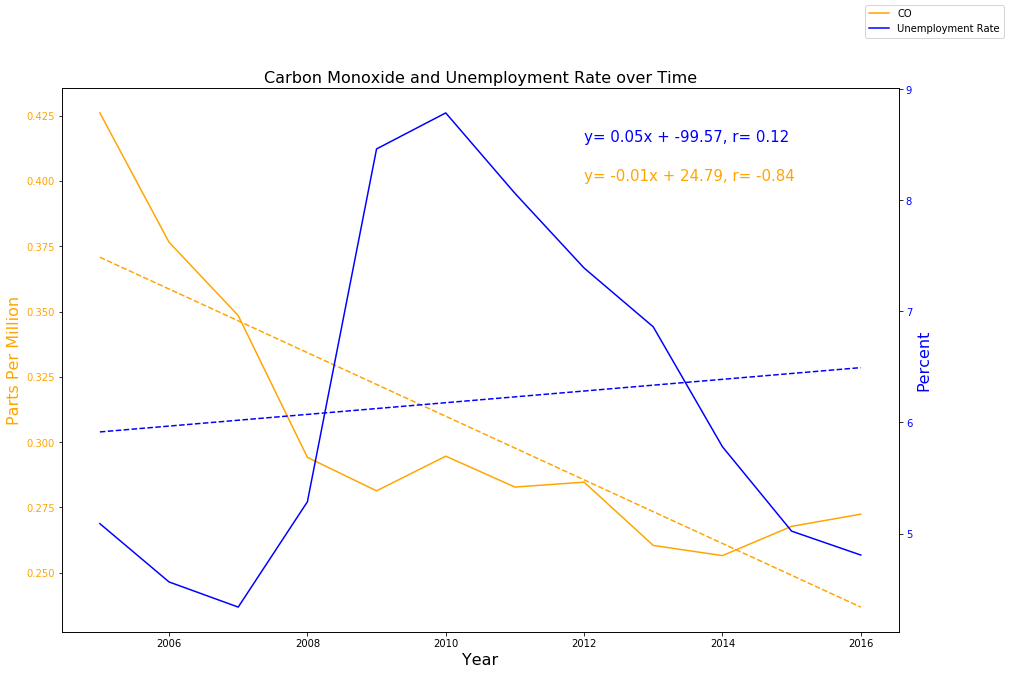

In [16]:
#Create lines for unemployment and SO2
CO_line = linear_regression(employ_pollutant_year.index, employ_pollutant_year["Average of CO Mean"])
employ_line = linear_regression(employ_pollutant_year.index, employ_pollutant_year["Unemployment"])
#Create string of linear equation to put on chart
CO_line_eq = linear_regression_eq(employ_pollutant_year.index, employ_pollutant_year["Average of CO Mean"])

#Create Figure
fig, ax1 = plt.subplots(figsize = (15,10))

color = 'orange'
ax1.set_xlabel('Year', fontsize = 16)
ax1.set_ylabel('Parts Per Million', color=color, fontsize = 16)
ax1.plot(employ_pollutant_year.index, employ_pollutant_year["Average of CO Mean"], color=color, label = "CO")
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(employ_pollutant_year.index,CO_line, color = 'orange', linestyle = '--')
ax1.annotate(CO_line_eq, (2012,0.4), fontsize = 15, color = "orange")
ax1.annotate(employ_line_eq, (2012,0.415), fontsize = 15, color = "blue")
#Plot unemployment on same graph
ax2 = ax1.twinx() 
color = 'blue'
ax2.set_ylabel('Percent', color=color, fontsize = 16)  
ax2.plot(employ_pollutant_year.index, employ_pollutant_year["Unemployment"], color=color, label = "Unemployment Rate")
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(employ_pollutant_year.index,employ_line, 'b--')
fig.legend(loc= 'upper right')
plt.title("Carbon Monoxide and Unemployment Rate over Time", fontsize = 16)
plt.show()
#Save figure
fig.savefig('Images/CO_vs_Unemployment.png')